In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

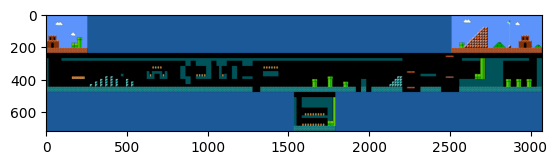

In [3]:
filename = 'levels/1-2.png'
img = cv2.imread(filename)
            
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

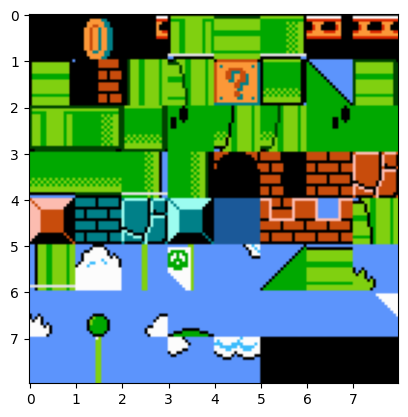

In [6]:
from ImageAnalyser import TileMap, Map

map = Map(img)
tilemap = map.getTileMap({
        'coin': (1,0),
        'platform': {'l': (2,0),'m':(7,0), 'r': (6,0)},
        'question_block': (4,1),
        'pipe': {'tl': (3,0), 'tr': (5,0), 'bl': (0,5), 'br': (2,3)},
        'rock': {'default': (7,3), 'under': (2,4)},
        'brick': {'default': (6,3), 'under': (1,4)},
        'hard_block': {'default': (0,4), 'under': (3,4)},
        'hill_top': (3,6),
        'cloud_start': (4,5),
        'cloud_end': (0,6),
    }
)
tilemap['pipe'] = {k:p.removeBackground([252, 148,  92]) for k,p in tilemap['pipe'].items()}
tilemap

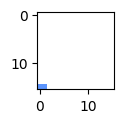

In [42]:
tilemap['pipe'][0].removeBackground([252, 148,  92])
tilemap['pipe'][0]

In [36]:
tilemap['pipe'][0].array[15,0]


array([252, 148,  92], dtype=uint8)

[]

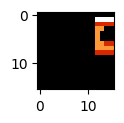

In [18]:
tilemap['platform']

In [222]:
known_blocks = 



# for k,(x,y) in known_blocks.items():
    # print(k)
    # tile_map.displayPosition(x,y)
    # plt.pause(0.5)
    # plt.show()

coin
platform
pipe
question_block
pipe2
rock
brick
hard_block
under_rock
under_brick
under_hard_block
hill_top
cloud_start
cloud_end


True

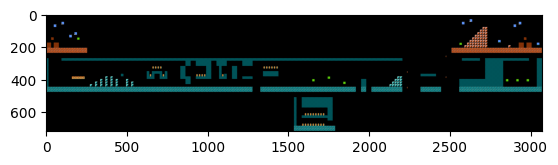

In [225]:
map_list = []
mask_list = []

for object_name,(x,y) in known_blocks.items():
    tile = tile_map.getBlock(x,y)
    print(object_name)
    positional_array.shape #(192, 45, 16, 16, 3)
    tile.shape #(16, 16, 3)

    # Get a mask of the first two axis where true if the block is the same as the tile
    mask = np.all(positional_array == tile, axis=(2,3,4))
    mask_list.append(mask)

    # plt.imshow(mask+1)
    # Get index where the mask is true
    index = np.where(mask)
    for i,j in zip(*index):
        map_list.append((object_name, (i,j)))

# Sort map list by x and then y
map_list.sort(key=lambda x: (x[1][0], x[1][1]))

# Create a mask where if any of the masks are true
mask = np.any(mask_list, axis=0)
mask = np.flip(mask, axis=1)
masked_image = np.copy(img)
# Upsample the mask to the size of the image
mask = np.repeat(np.repeat(mask, 16, axis=0), 16, axis=1)
# Set all pixels to black where the mask is false
masked_image[~mask.T] = (0,0,0)
plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))

cv2.imwrite('masked_image.png', masked_image)


In [212]:
mask.shape

(3072, 720)

In [200]:
plt.imshow(mask.reshape(720, 3072, 3)+1)

ValueError: cannot reshape array of size 8640 into shape (720,3072,3)

In [194]:
masked_image.shape

(720, 3072, 3)

In [ ]:
# PRINT IDENTIFIED BLOCKS
for i,j in indentified_blocks.values():
    print(f'({i},{j}):"",')
    display_block((i,j))

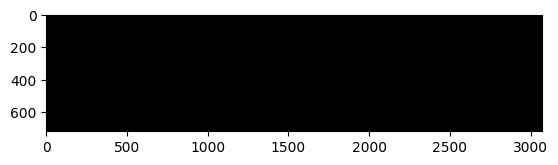

In [31]:
known_blocks = {
    (44,111):"under_rock",
    (27,137):"under_hard",
    (24,14):"question",
    (42,107):"coin",
    (42,96):"under_brick",
    (28,139):"platform_1",
    (28,141):"platform_2",
    (28,142):"platform_3",
    (14,191):"stone",
    (11,190):"hilltop",
    (12,187):"bricks",
    (12,179):"hard_block",
    (7,9):"cloud",
}

def matchBlock(block):
    for i,j in indentified_blocks.values():
        if np.array_equal(block, getBlock((i,j))):
            return known_blocks[(i,j)]
    return False


new_img = img*0
for i in range(len(blocks)):
    for j in range(len(blocks[i])):
        block = getBlock((i,j))
        if matchBlock(block):
            print('match')
            break
    break
plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB)) 


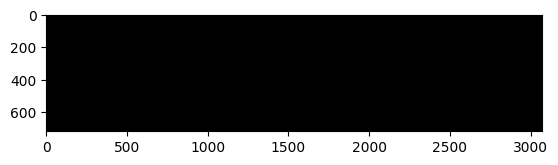

In [89]:
plt.imshow((img[:,:] == color).astype(int))

In [82]:
img[:,:] == color

array([[[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       ...,

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False,

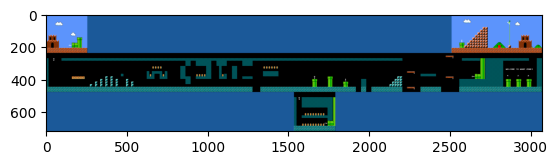

In [66]:
def showPos(pos):
    i,j = pos
    img_2= img.copy()
    img_2[i*16:i*16+16,j*16:j*16+16] = [0,0,255]
    plt.imshow(cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB))
    plt.pause(0.01)
    plt.show()



showPos((12, 175))

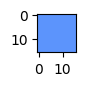

In [55]:


display_block(img[:16, 0:16])

In [29]:
block_mean, block_std = feature_extraction(blocks[0][15])
blue_std, green_std, red_std = block_std
print(blue_std, green_std, red_std)
if abs(blue_std) <= 10 and abs(green_std) <= 10 and abs(red_std) <= 10:
    print('background')

0.0 0.0 0.0
background
